
#### <span style = 'color:blue'> Problem statement : Perform sentiment analysis on Omnicron variant, data fetching directly from twitter</span>
**Sentiment analysis is the process of identifying feelings and emotions expressed in words, through ML or AI**

**Project Pipeline**

Various steps in completing project are

- **Import Necessary Dependencies**
- **Read and Load the Dataset**
- **Exploratory Data Analysis**
- **Data Visualization of Target Variables**
- **Data Preprocessing**
- **Splitting our data into Train and Test Subset**
- **Transforming Dataset using TF-IDF Vectorizer**
- **Function for Model Evaluation**
- **Model Building**
- **Conclusion**

- Here we have to get dataset directly fetched from twitter in realtime 

- performing realtime sentimental analysis on realtime data collecting from twitter
- objective: perform sentiment analysis on realtime data collected from twitter 

                      

           

### <span style = 'color:blue'>   API (Application Programm Interface)</span>
- Imagine you’re sitting at a table in a restaurant with a menu of choices to order from. The kitchen is the part of the “system” that will prepare your order. What is missing is the critical link to communicate your order to the kitchen and deliver your food back to your table. That’s where the waiter or API comes in. The waiter is the messenger – or API – that takes your request or order and tells the kitchen – the system – what to do. Then the waiter delivers the response back to you; in this case, it is the food.
- API's are huge and are used everywhere
- In simple words api stands as bridge for one to access the content in one's storage 
- There are many APIs on the Twitter platform that software developers can engage with, with the ultimate possibility to create fully automated systems which will interact with Twitter. While this feature could benefit companies by drawing insights from Twitter data

   **From twitter api it's possible to extract many insights some are**
- Tweets: searching, posting, filtering, engagement, streaming etc.
- Accounts and users (Beta): account management, user interactions.
- Media: uploading and accessing photos, videos and animated GIFs.
- Trends: trending topics in a given location.
- Geo: information about known places or places near a location.

**Getting twitter API keys**
- If you don't already have an account, you can login with your normal Twitter credentials 


- follow the required prompts to create a developer project or click here <a href="https://dev.twitter.com/apps" title="Twitter">Click here</a>
- Requesting the API key and secret via the Developer Portal causes Twitter to produce the following three things:
1. API key (this is your 'consumer key')
2. API secret key (this is your 'consumer secret')
3. Bearer token
- Next, visit the 'Authentication Tokens' area of the Developer Portal and generate an 'Access token & secret'. This will provide you with the following two items:
1. Access token (this is your 'token key')
2. Access token secret (this is your 'token secret')


**Expected output**
- the data fetched from twitter should undergo EDA for analyzing, cleaning, handling, manupulation, visualization..,etc
- final output should show the sentiment of the data


  *Some tips to consider*

- Machines can learn in every possible way so its always better to think out of the box
    
- Perform eda as diverse as possible and in contineous manner
    
- Try configuring with diffrent models to know how each model is diffrent with other ones 
    
- Donot try to involve unneccesory codes and useless algorithms for dataset which just increases complexity
    
- Approaching problem statement in n number of ways helps us to find best one possible
    
- It's easier for one to understnd and manupulate if we have models as simple as possible 
    
- When we have multiple models we can have multiple judgements based on models and their efficiencies
    
- Tuning helps increasing accuracy :)
    
- Have an idea of time consumed by the model, its better to have a model whose time management is good
    
- Spend good amount of time on analyzing dataset and draw as much insights as possible

- Tweepy is importantlibrary we will using to fetch data from twitter by api


For more on tweepy documentation please click here <a href="https://docs.tweepy.org/en/stable/getting_started.html#hello-tweepy" title="Tweepy">Click here</a>

# Project Objective

- In this we want to Analyze the Sentiments of tweets related to omicron virus

#### Steps Involved in Analysis are:-


- We need to extract the tweets related to omicron using twitter API
- We will perform preprocessing steps on dataset to clean the text data. 
- Finding the sentiment of tweets using polarity 
- we will remove the unwanted characters, texts present in tweets
- we will perform tokenization, stemming and lemmatization on text of tweets
- we will visualize the hastags present in every tweets
- we will analyze and visualize the words of tweets as per sentiment category.
- thereafter we will go for modelling stage, wherein we will apply various classification algorithms to classify the sentiments of tweets.

In [5]:
# Import tweepy to work with the twitter API
import tweepy as tw

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

# nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Boosting
import lightgbm as lgb

# scipy stats
import scipy.stats as stats

In [7]:
consumer_key = '--'
consumer_secret = '--'
access_token = '--'
access_token_secret = '--'

In [8]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

In [6]:

# Set the limit of number of records
number_of_tweets = 10000

# Create columns for the DataFrame
columns = ['tweets','likes','time','retweet_count']

# Create a dataframe with the results
df = pd.DataFrame(columns=columns)
msgs = []
ms=[]

# Search using pagination
for tweet in tw.Cursor(api.search_tweets, q='#Omicron OR Omicron OR omicron'+" -filter:retweets",lang='en',tweet_mode='extended').items(number_of_tweets):
    msg = [tweet.full_text,tweet.favorite_count,tweet.created_at,tweet.retweet_count]
    msg = tuple(msg)
    msgs.append(msg)
    
df = pd.DataFrame(msgs,columns=columns)


Rate limit reached. Sleeping for: 798
Rate limit reached. Sleeping for: 794
Rate limit reached. Sleeping for: 790


In [8]:
# for further purposes we will save the dataframe to csv file, this is because for further usage we can easily use the dataset
df.to_csv('twitter_omicron')

In [9]:
# we will read the saved csv.
df = pd.read_csv('twitter_omicron',index_col=0)

In [10]:
df

tweets  likes  \
0     ….Booster vaccination followed by a primary om...      0   
1     Here the researchers investigated two immune h...      0   
2     Another study concurs: reinfection in unvaxxed...      0   
3     @marcorubio Wants to shut down the state from ...      0   
4     This finding suggests that the primary omicron...      0   
...                                                 ...    ...   
9995  @theage cancel culture ?   .... nah , more lik...      0   
9996  Someone takes the booster the body creates the...      0   
9997  @SmedleyHuxley @of_davey @thereal_truther Beca...      1   
9998  @1goodtern But omicron is weaker than past var...      0   
9999  @AtomsksSanakan @sinquirls @WashburneAlex @gor...      0   

                           time  retweet_count  
0     2022-11-02 05:26:10+00:00              0  
1     2022-11-02 05:25:51+00:00              0  
2     2022-11-02 05:25:31+00:00              0  
3     2022-11-02 05:24:40+00:00              0  
4     2022-11-02 05:23:08+00:00              0  
...                         ...            ...  
9995  2022-10-26 13:20:03+00:00              0  
9996  2022-10-26 13:19:02+00:00              0  
9997  2022-10-26 13:14:46+00:00              1  
9998  2022-10-26 13:13:53+00:00              0  
9999  2022-10-26 13:13:48+00:00              0  

[10000 rows x 4 columns]

In [11]:
# let's see the counts of retweet
df['retweet_count'].value_counts()

0      8288
1       786
2       274
3       105
4        92
       ... 
134       1
312       1
27        1
265       1
229       1
Name: retweet_count, Length: 104, dtype: int64

In [12]:
# dertermine the length of tweets to analyze further
df['length'] = df['tweets'].str.len()

In [14]:
pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
Note: you may need to restart the kernel to use updated packages.


In [15]:
# Many tweets must be having many unwanted characters so we will use regex to remove that
import nltk
from textblob import TextBlob
import re
def clean_tweet(tweet):
    
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

# Also we will create a function to categories the sentiment of tweets using the polarity of tweets

def analyze_sentiment(tweet):
    
    '''
    Utility function to analyze the sentiment of text 
    using the polarity, thereby classifying in 3 categories. 
    '''
    
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [16]:
# We create a column with the result of the analysis:
df['Sentiment_analysis'] = np.array([ analyze_sentiment(tweet) for tweet in df['tweets'] ])
# We display the updated dataframe with the new column:
display(df.head(10))

tweets  likes  \
0  ….Booster vaccination followed by a primary om...      0   
1  Here the researchers investigated two immune h...      0   
2  Another study concurs: reinfection in unvaxxed...      0   
3  @marcorubio Wants to shut down the state from ...      0   
4  This finding suggests that the primary omicron...      0   
5  Omicron’s XBB strains not causing severe illne...      0   
6  This study though shows some negative effect o...      0   
7  @RedLightning420 The chances of this are basic...      0   
8  @dteller1221 @mrmickme @BNOFeed The Omicron wa...      0   
9  @ShenandoahWrit1 The pandemic is a ghost!\nOmi...      0   

                        time  retweet_count  length Sentiment_analysis  
0  2022-11-02 05:26:10+00:00              0     118           Positive  
1  2022-11-02 05:25:51+00:00              0     236           Positive  
2  2022-11-02 05:25:31+00:00              0     301            Neutral  
3  2022-11-02 05:24:40+00:00              0     147           Positive  
4  2022-11-02 05:23:08+00:00              0     263           Positive  
5  2022-11-02 05:22:31+00:00              0     220           Positive  
6  2022-11-02 05:22:16+00:00              0     239           Positive  
7  2022-11-02 05:21:45+00:00              0     109            Neutral  
8  2022-11-02 05:21:37+00:00              0      96           Negative  
9  2022-11-02 05:21:30+00:00              0     159           Negative

<AxesSubplot:>

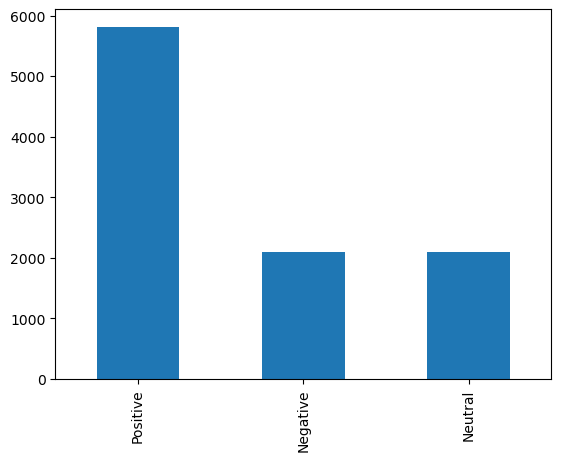

In [17]:
# now let's look at the count of different sentiment
df['Sentiment_analysis'].value_counts().plot(kind='bar')

In [18]:
# Now we will apply clean_tweet function on tweet column to remove unwanted characters
df['clean_tweets'] = df['tweets'].apply(clean_tweet)

In [19]:
df

tweets  likes  \
0     ….Booster vaccination followed by a primary om...      0   
1     Here the researchers investigated two immune h...      0   
2     Another study concurs: reinfection in unvaxxed...      0   
3     @marcorubio Wants to shut down the state from ...      0   
4     This finding suggests that the primary omicron...      0   
...                                                 ...    ...   
9995  @theage cancel culture ?   .... nah , more lik...      0   
9996  Someone takes the booster the body creates the...      0   
9997  @SmedleyHuxley @of_davey @thereal_truther Beca...      1   
9998  @1goodtern But omicron is weaker than past var...      0   
9999  @AtomsksSanakan @sinquirls @WashburneAlex @gor...      0   

                           time  retweet_count  length Sentiment_analysis  \
0     2022-11-02 05:26:10+00:00              0     118           Positive   
1     2022-11-02 05:25:51+00:00              0     236           Positive   
2     2022-11-02 05:25:31+00:00              0     301            Neutral   
3     2022-11-02 05:24:40+00:00              0     147           Positive   
4     2022-11-02 05:23:08+00:00              0     263           Positive   
...                         ...            ...     ...                ...   
9995  2022-10-26 13:20:03+00:00              0     144           Positive   
9996  2022-10-26 13:19:02+00:00              0     194            Neutral   
9997  2022-10-26 13:14:46+00:00              1     339           Positive   
9998  2022-10-26 13:13:53+00:00              0      88           Negative   
9999  2022-10-26 13:13:48+00:00              0     346           Positive   

                                           clean_tweets  
0     Booster vaccination followed by a primary omic...  
1     Here the researchers investigated two immune h...  
2     Another study concurs reinfection in unvaxxed ...  
3     Wants to shut down the state from covid even t...  
4     This finding suggests that the primary omicron...  
...                                                 ...  
9995  cancel culture nah more likely pple who had bo...  
9996  Someone takes the booster the body creates the...  
9997  davey truther Because Omicron is the most cont...  
9998  But omicron is weaker than past variants so wh...  
9999  truther He predicted no vaccine effect against...  

[10000 rows x 7 columns]

In [20]:
# Tokenize 
df['token_tweets'] = df["clean_tweets"].apply(lambda x:x.split())
df

tweets  likes  \
0     ….Booster vaccination followed by a primary om...      0   
1     Here the researchers investigated two immune h...      0   
2     Another study concurs: reinfection in unvaxxed...      0   
3     @marcorubio Wants to shut down the state from ...      0   
4     This finding suggests that the primary omicron...      0   
...                                                 ...    ...   
9995  @theage cancel culture ?   .... nah , more lik...      0   
9996  Someone takes the booster the body creates the...      0   
9997  @SmedleyHuxley @of_davey @thereal_truther Beca...      1   
9998  @1goodtern But omicron is weaker than past var...      0   
9999  @AtomsksSanakan @sinquirls @WashburneAlex @gor...      0   

                           time  retweet_count  length Sentiment_analysis  \
0     2022-11-02 05:26:10+00:00              0     118           Positive   
1     2022-11-02 05:25:51+00:00              0     236           Positive   
2     2022-11-02 05:25:31+00:00              0     301            Neutral   
3     2022-11-02 05:24:40+00:00              0     147           Positive   
4     2022-11-02 05:23:08+00:00              0     263           Positive   
...                         ...            ...     ...                ...   
9995  2022-10-26 13:20:03+00:00              0     144           Positive   
9996  2022-10-26 13:19:02+00:00              0     194            Neutral   
9997  2022-10-26 13:14:46+00:00              1     339           Positive   
9998  2022-10-26 13:13:53+00:00              0      88           Negative   
9999  2022-10-26 13:13:48+00:00              0     346           Positive   

                                           clean_tweets  \
0     Booster vaccination followed by a primary omic...   
1     Here the researchers investigated two immune h...   
2     Another study concurs reinfection in unvaxxed ...   
3     Wants to shut down the state from covid even t...   
4     This finding suggests that the primary omicron...   
...                                                 ...   
9995  cancel culture nah more likely pple who had bo...   
9996  Someone takes the booster the body creates the...   
9997  davey truther Because Omicron is the most cont...   
9998  But omicron is weaker than past variants so wh...   
9999  truther He predicted no vaccine effect against...   

                                           token_tweets  
0     [Booster, vaccination, followed, by, a, primar...  
1     [Here, the, researchers, investigated, two, im...  
2     [Another, study, concurs, reinfection, in, unv...  
3     [Wants, to, shut, down, the, state, from, covi...  
4     [This, finding, suggests, that, the, primary, ...  
...                                                 ...  
9995  [cancel, culture, nah, more, likely, pple, who...  
9996  [Someone, takes, the, booster, the, body, crea...  
9997  [davey, truther, Because, Omicron, is, the, mo...  
9998  [But, omicron, is, weaker, than, past, variant...  
9999  [truther, He, predicted, no, vaccine, effect, ...  

[10000 rows x 8 columns]

In [21]:
# Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def simpleStemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

df['stem_tweets'] = df['clean_tweets'].apply(simpleStemmer)
df.head()

tweets  likes  \
0  ….Booster vaccination followed by a primary om...      0   
1  Here the researchers investigated two immune h...      0   
2  Another study concurs: reinfection in unvaxxed...      0   
3  @marcorubio Wants to shut down the state from ...      0   
4  This finding suggests that the primary omicron...      0   

                        time  retweet_count  length Sentiment_analysis  \
0  2022-11-02 05:26:10+00:00              0     118           Positive   
1  2022-11-02 05:25:51+00:00              0     236           Positive   
2  2022-11-02 05:25:31+00:00              0     301            Neutral   
3  2022-11-02 05:24:40+00:00              0     147           Positive   
4  2022-11-02 05:23:08+00:00              0     263           Positive   

                                        clean_tweets  \
0  Booster vaccination followed by a primary omic...   
1  Here the researchers investigated two immune h...   
2  Another study concurs reinfection in unvaxxed ...   
3  Wants to shut down the state from covid even t...   
4  This finding suggests that the primary omicron...   

                                        token_tweets  \
0  [Booster, vaccination, followed, by, a, primar...   
1  [Here, the, researchers, investigated, two, im...   
2  [Another, study, concurs, reinfection, in, unv...   
3  [Wants, to, shut, down, the, state, from, covi...   
4  [This, finding, suggests, that, the, primary, ...   

                                         stem_tweets  
0  booster vaccin follow by a primari omicron inf...  
1  here the research investig two immun histori w...  
2  anoth studi concur reinfect in unvax who had c...  
3  want to shut down the state from covid even th...  
4  thi find suggest that the primari omicron infe...

In [22]:
#Lemmatizing 
def simpleLemmatization(text):
    lemma = nltk.stem.WordNetLemmatizer()
    text = ' '.join([lemma.lemmatize(word) for word in text.split()])
    return text

df['lemmatize_tweets'] = df['clean_tweets'].apply(simpleLemmatization)
df.head()

tweets  likes  \
0  ….Booster vaccination followed by a primary om...      0   
1  Here the researchers investigated two immune h...      0   
2  Another study concurs: reinfection in unvaxxed...      0   
3  @marcorubio Wants to shut down the state from ...      0   
4  This finding suggests that the primary omicron...      0   

                        time  retweet_count  length Sentiment_analysis  \
0  2022-11-02 05:26:10+00:00              0     118           Positive   
1  2022-11-02 05:25:51+00:00              0     236           Positive   
2  2022-11-02 05:25:31+00:00              0     301            Neutral   
3  2022-11-02 05:24:40+00:00              0     147           Positive   
4  2022-11-02 05:23:08+00:00              0     263           Positive   

                                        clean_tweets  \
0  Booster vaccination followed by a primary omic...   
1  Here the researchers investigated two immune h...   
2  Another study concurs reinfection in unvaxxed ...   
3  Wants to shut down the state from covid even t...   
4  This finding suggests that the primary omicron...   

                                        token_tweets  \
0  [Booster, vaccination, followed, by, a, primar...   
1  [Here, the, researchers, investigated, two, im...   
2  [Another, study, concurs, reinfection, in, unv...   
3  [Wants, to, shut, down, the, state, from, covi...   
4  [This, finding, suggests, that, the, primary, ...   

                                         stem_tweets  \
0  booster vaccin follow by a primari omicron inf...   
1  here the research investig two immun histori w...   
2  anoth studi concur reinfect in unvax who had c...   
3  want to shut down the state from covid even th...   
4  thi find suggest that the primari omicron infe...   

                                    lemmatize_tweets  
0  Booster vaccination followed by a primary omic...  
1  Here the researcher investigated two immune hi...  
2  Another study concurs reinfection in unvaxxed ...  
3  Wants to shut down the state from covid even t...  
4  This finding suggests that the primary omicron...

In [24]:
pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)
Note: you may need to restart the kernel to use updated packages.


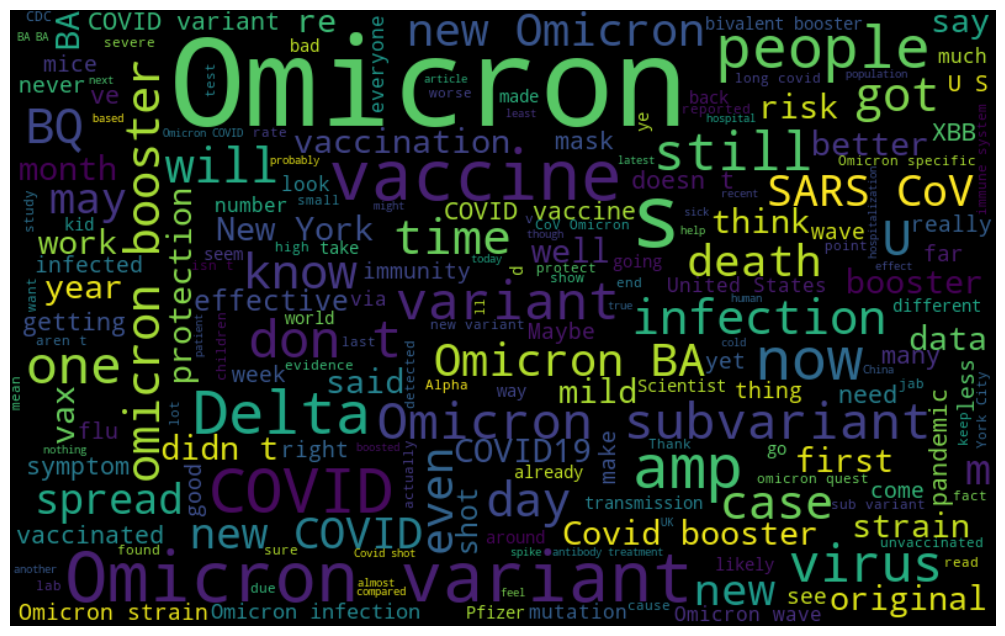

In [25]:

# visualize frequent words
all_words = " ".join([sentence for sentence in df["clean_tweets"]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

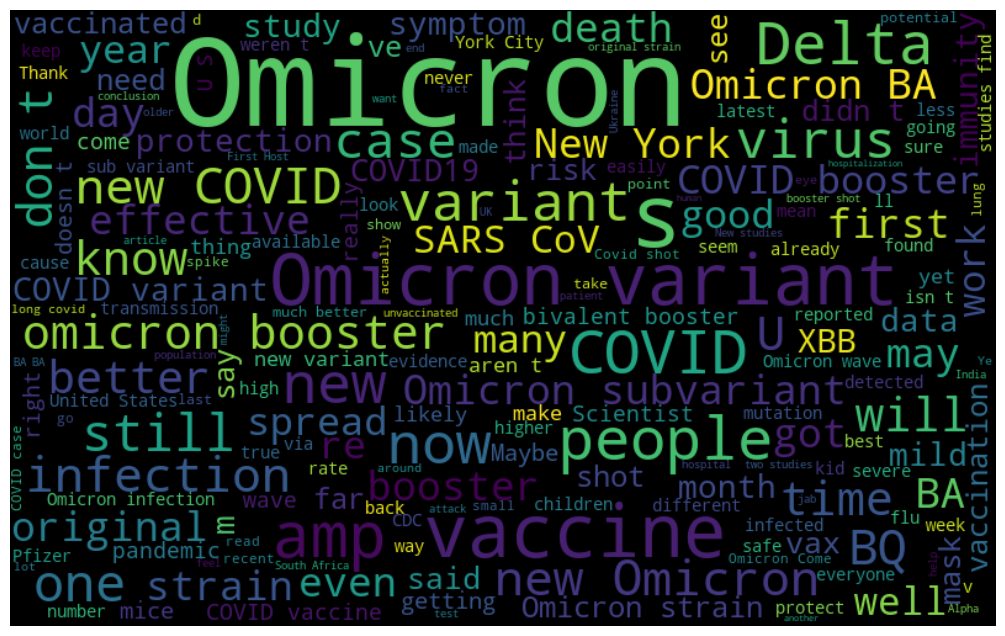

In [26]:
# Frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df["clean_tweets"][df["Sentiment_analysis"] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

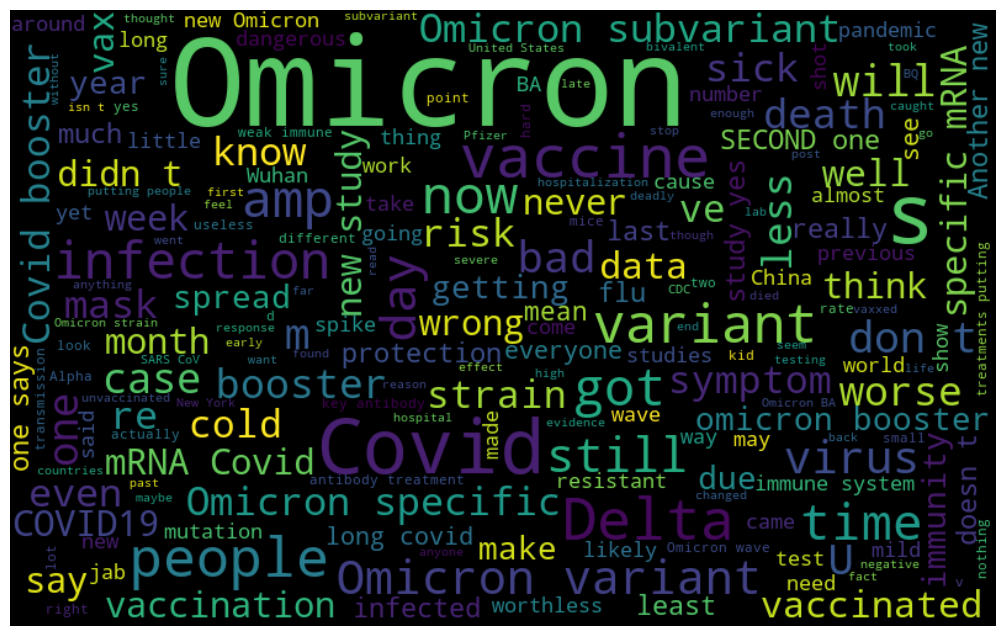

In [27]:
# Frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df["clean_tweets"][df["Sentiment_analysis"] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
# Now to furtehr analyze the tweets we will extract the hashtags from every tweets and try to look hashtags of different sentiment.


# extracting the hashtags
def hashtag_extract(tweets):
    hashtags = []
# loop words in a tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [29]:
# extract hashtags from positive tweets
ht_positive = hashtag_extract(df["tweets"][df["Sentiment_analysis"] == 'Positive'])

# extract hashtags from negative tweets
ht_neutral = hashtag_extract(df["tweets"][df["Sentiment_analysis"]=='Neutral'])

# extract hashtags from negative tweets
ht_negative = hashtag_extract(df["tweets"][df["Sentiment_analysis"]== 'Negative'])

In [30]:
#unnest list
ht_positive = sum(ht_positive, [])
ht_neutral  = sum(ht_neutral,[])
ht_negative = sum(ht_negative, [])

In [31]:
ht_positive

['INSACOG',
 'covid19',
 'covid19variant',
 'omicron',
 'omicronsubvariant',
 'XBBvariant',
 'genomesequencing',
 'healthnews',
 'Indian',
 'Omicron',
 'Omicron',
 'XBB',
 'COVID19',
 'Omicron',
 'COVID19',
 'COVID',
 'LongCovid',
 'COVID19',
 'India',
 'CoronavirusUpdates',
 'CoronavirusOutbreak',
 'pandemic',
 'COVID',
 'COVID',
 'wave',
 'Omicron',
 'TheIndianSun',
 'India',
 'COVID',
 'Maharashtra',
 'Kerala',
 'TamilNadu',
 'Karnataka',
 'Telengana',
 'Goa',
 'Pondicherry',
 'Karnataka',
 'TN',
 'Maharashtra',
 'COVID19',
 'Omicron',
 'MaskUp',
 'PapuaIndonesia',
 'ranaja',
 'COVID19NZ',
 'California',
 'covid19',
 'health',
 'legalcentric',
 'Omicron',
 'Omicron',
 'Omicron',
 'Omicron',
 'Omicron',
 'Omicron',
 'Omicron',
 'Omicron',
 'Omicron',
 'COVID19',
 'Omicron',
 'Omicron',
 'Omicron',
 'omicron',
 'Omicron',
 'Omicron',
 'omicron',
 'omicron',
 'omicron',
 'NotCOVID',
 'omicron',
 'ffxiv',
 'FFXIVART',
 'eorzeadiary',
 'COVID19',
 'omicron',
 'omicron',
 'omicron',
 'omi

In [32]:
ht_neutral

['ICYMI',
 'subscriber',
 'expandbusiness',
 'commcercialinvestment',
 'koregaonparkproperty',
 'OmicronProperties',
 'OmicronCommerz',
 'OmicronPromise',
 'thewaveofsucess',
 'medRxiv',
 'medRxiv',
 'freeaccess',
 'medtwitter',
 'PFEColleague',
 'subscriber',
 'PapuaIndonesia',
 'ranaja',
 'PapuaIndonesia',
 'ranaja',
 'COVID19SL',
 'SriLanka',
 'lka',
 'GreenAcres',
 'Futurama',
 'Paxlovid',
 'California',
 'COVID',
 'Omicron',
 'BQ',
 'NewYork',
 'Germany',
 'France',
 'England',
 'Denmark',
 'COVIDTwitter',
 'MedTwitter',
 'ScienceTwitter',
 'PFEColleague',
 'CovidIsNotOver',
 'WearAMask',
 'LongCovid',
 'Explained',
 'TerranTradeAuthority',
 'LookingGlassAI',
 'COVID',
 'LongCovid',
 'COVID',
 'CovidIsNotOver',
 'COVIDIsAirborne',
 'covid',
 'COVID19',
 'Covid_19',
 'Omicron',
 'vaccination',
 'research',
 'MedTwitter',
 'MedEd',
 'brainfog',
 'SciComm',
 'Recruiting',
 'BayCrest',
 'RecruiterTwitter',
 'HR',
 'Unemployment',
 'FDJ',
 'ADP',
 'PSG',
 'OMICRON',
 'DALS',
 'COVID19'

In [33]:
ht_negative

['India',
 'COVID',
 'Punjab',
 'COVID19',
 'Omicron',
 'MaskUp',
 'Omicron',
 'Covid',
 'DoubleThink',
 'GeorgeOrwell',
 'Covid19',
 'Deltacrons',
 'Delta',
 'Omicron',
 'frankenvirus',
 'Omicron',
 'Omicron',
 'Omicron',
 'Omicron',
 'OMICRON',
 'OMICRON',
 'OMICRON',
 'ENZC',
 '2',
 'COVID19',
 'COVID',
 'COVID19',
 'COVID19Aus',
 'PSA',
 'WearAMask',
 'LongCovid',
 'boosters',
 'BA4',
 'BA5',
 'COVID',
 'BQ11',
 'COVID',
 'haiku',
 'poetry',
 'micropoetry',
 'poem',
 'GrimReaper',
 'Death',
 'Candy',
 'covid19',
 'omicron',
 'omicronvariants',
 'pandemic',
 'Halloween',
 'biowar',
 'Ukraine',
 'COVID',
 'WeCanDoThis',
 '1',
 'covid19sk',
 'Saskatchewan',
 'CovidIsNotOver',
 'CovidVaccine',
 'COVID19',
 'StopTheSpread',
 'UpdatedBooster',
 'FluShot',
 'govbn',
 'brunei',
 'MedTwitter',
 'ufotwitter',
 'alien',
 'disclosure',
 'UFOs',
 'UAPs',
 'film',
 'scifi',
 'UFO',
 'uaptwitter',
 'movie',
 'aliens',
 'Cinema',
 'sciencefiction',
 'bmovies',
 'comedy',
 'cultmovies',
 'bw',
 'me

In [34]:
# As seens in above list of positive words there are many similar words but different spelling and different case
# so we will lower the case of every word and than replace different variant of covid19 to covid19

ht_positive_lower = [s.lower() for s in ht_positive]
ht_positive_lower_replace = [sub.replace('covid','covid19') for sub in ht_positive_lower]
ht_positive_lower_replace = [sub.replace('covid1919','covid19') for sub in ht_positive_lower_replace]  
ht_positive_lower_replace

# as done in the hashtags of positive tweets we will do the same for neutral tweets
ht_neutral_lower = [s.lower() for s in ht_neutral]
ht_neutral_lower_replace = [sub.replace('covid','covid19') for sub in ht_neutral_lower]
ht_neutral_lower_replace = [sub.replace('covid1919','covid19') for sub in ht_neutral_lower_replace]  

# as done in the hashtags of positive tweets we will do the same for negative tweets
ht_negative_lower = [s.lower() for s in ht_negative]
ht_negative_lower_replace = [sub.replace('covid','covid19')for sub in ht_negative_lower]
ht_negative_lower_replace = [sub.replace('covid1919','covid19') for sub in ht_negative_lower_replace]

In [35]:
# as done in the hashtags of positive tweets we will do the same for negative tweets

ht_negative_lower = [s.lower() for s in ht_negative]
ht_negative_lower_replace = [sub.replace('covid','covid19')for sub in ht_negative_lower]
ht_negative_lower_replace = [sub.replace('covid1919','covid19') for sub in ht_negative_lower_replace]
ht_negative_lower_replace

['india',
 'covid19',
 'punjab',
 'covid19',
 'omicron',
 'maskup',
 'omicron',
 'covid19',
 'doublethink',
 'georgeorwell',
 'covid19',
 'deltacrons',
 'delta',
 'omicron',
 'frankenvirus',
 'omicron',
 'omicron',
 'omicron',
 'omicron',
 'omicron',
 'omicron',
 'omicron',
 'enzc',
 '2',
 'covid19',
 'covid19',
 'covid19',
 'covid19aus',
 'psa',
 'wearamask',
 'longcovid19',
 'boosters',
 'ba4',
 'ba5',
 'covid19',
 'bq11',
 'covid19',
 'haiku',
 'poetry',
 'micropoetry',
 'poem',
 'grimreaper',
 'death',
 'candy',
 'covid19',
 'omicron',
 'omicronvariants',
 'pandemic',
 'halloween',
 'biowar',
 'ukraine',
 'covid19',
 'wecandothis',
 '1',
 'covid19sk',
 'saskatchewan',
 'covid19isnotover',
 'covid19vaccine',
 'covid19',
 'stopthespread',
 'updatedbooster',
 'flushot',
 'govbn',
 'brunei',
 'medtwitter',
 'ufotwitter',
 'alien',
 'disclosure',
 'ufos',
 'uaps',
 'film',
 'scifi',
 'ufo',
 'uaptwitter',
 'movie',
 'aliens',
 'cinema',
 'sciencefiction',
 'bmovies',
 'comedy',
 'cultmo

In [36]:
# As we have got the list of hashtags in every categories, we will get the count number of time every hashatgs are used
# and will visualize the same
#using a dict from nltk

# getting hashtags for positive sentiments
freq = nltk.FreqDist(ht_positive_lower_replace)
p = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count':list(freq.values())})
p.head()

Hashtag  Count
0            insacog      3
1            covid19    343
2     covid19variant      2
3            omicron    475
4  omicronsubvariant      6

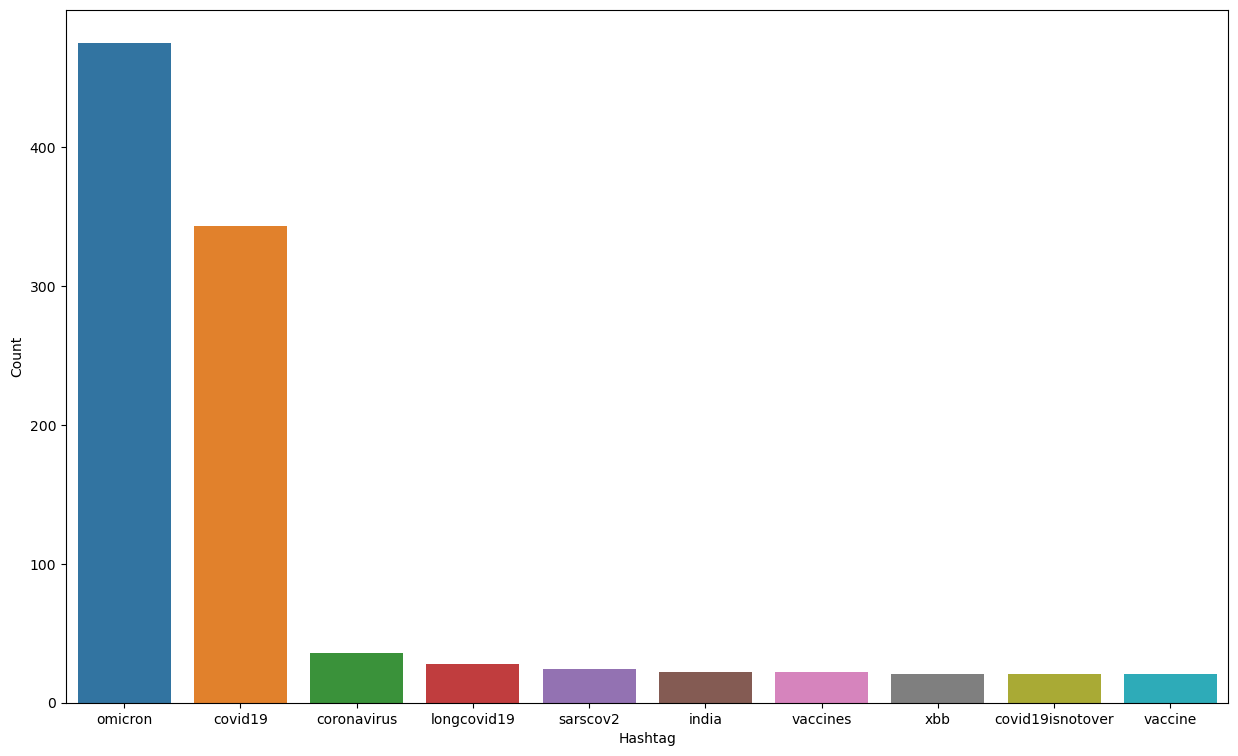

In [37]:
# Using barplot to visualize top 10 hashtags as per count
# select top 10 hashtags
p = p.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=p,x='Hashtag',y='Count')
plt.show()

- We can see that in positive sentiment omicron, covid19 are the hastags which are used the most.

In [38]:
# getting hashtags for negative sentiments
#using a dict from nltk
freq = nltk.FreqDist(ht_negative_lower_replace)
n = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count':list(freq.values())})
n.head()

Hashtag  Count
0    india      3
1  covid19     92
2   punjab      1
3  omicron    112
4   maskup      5

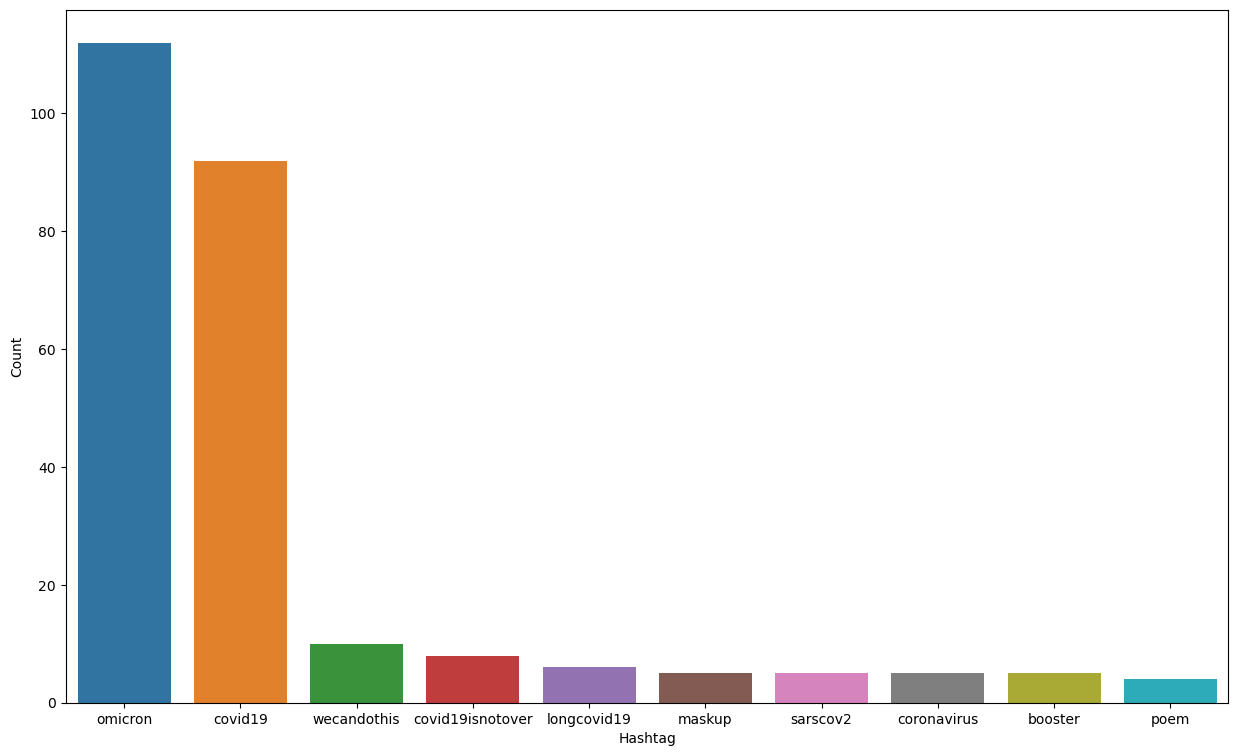

In [39]:
# Using barplot to visualize top 10 hashtags as per count
# select top 10 hashtags
n = n.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=n,x='Hashtag',y='Count')
plt.show()

- We can see that in negative sentiment also omicron, covid19 are the hastags which are used the most.

In [40]:
# getting hashtags for neutral sentiments
#using a dict from nltk
freq = nltk.FreqDist(ht_neutral_lower_replace)
nu = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count':list(freq.values())})
nu.head()

Hashtag  Count
0                  icymi      1
1             subscriber      2
2         expandbusiness      1
3  commcercialinvestment      1
4   koregaonparkproperty      1

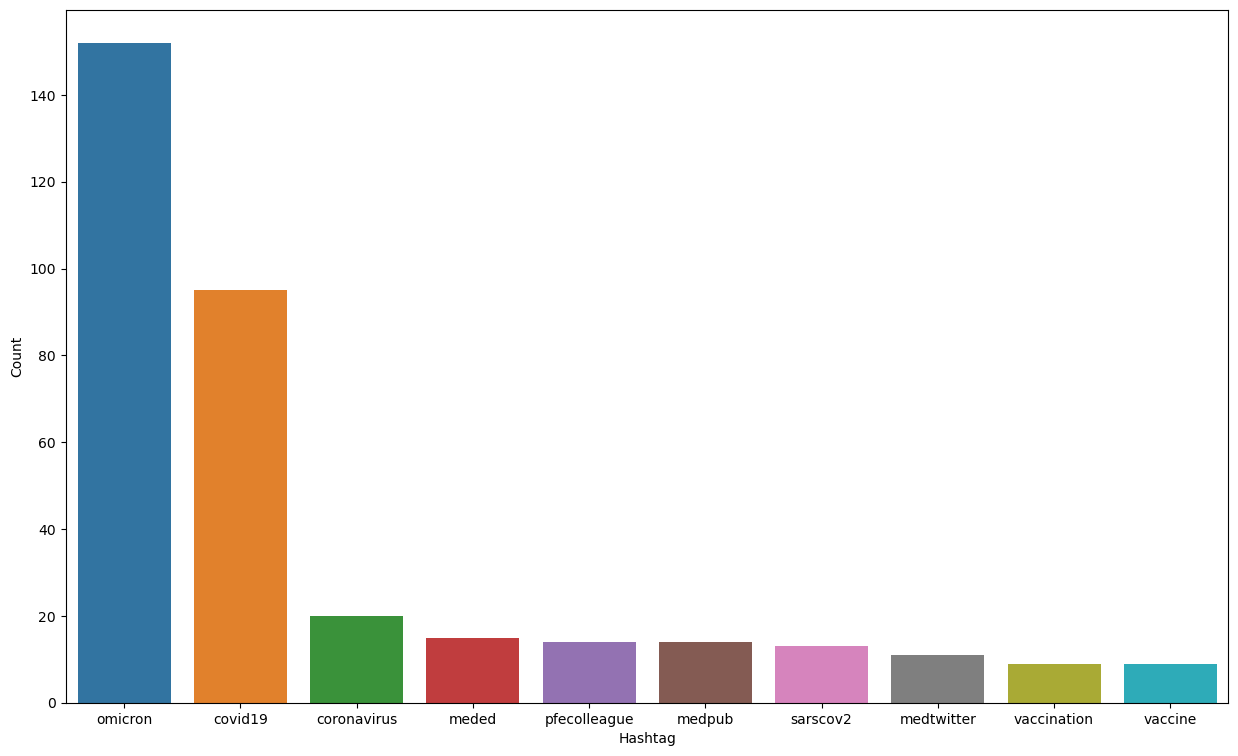

In [41]:
# Using barplot to visualize top 10 hashtags as per count
# select top 10 hashtags
nu = nu.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=nu,x='Hashtag',y='Count')
plt.show()

- We can see that in neutral sentiment also omicron, covid19 are the hastags which are used the most.

In [42]:
df

tweets  likes  \
0     ….Booster vaccination followed by a primary om...      0   
1     Here the researchers investigated two immune h...      0   
2     Another study concurs: reinfection in unvaxxed...      0   
3     @marcorubio Wants to shut down the state from ...      0   
4     This finding suggests that the primary omicron...      0   
...                                                 ...    ...   
9995  @theage cancel culture ?   .... nah , more lik...      0   
9996  Someone takes the booster the body creates the...      0   
9997  @SmedleyHuxley @of_davey @thereal_truther Beca...      1   
9998  @1goodtern But omicron is weaker than past var...      0   
9999  @AtomsksSanakan @sinquirls @WashburneAlex @gor...      0   

                           time  retweet_count  length Sentiment_analysis  \
0     2022-11-02 05:26:10+00:00              0     118           Positive   
1     2022-11-02 05:25:51+00:00              0     236           Positive   
2     2022-11-02 05:25:31+00:00              0     301            Neutral   
3     2022-11-02 05:24:40+00:00              0     147           Positive   
4     2022-11-02 05:23:08+00:00              0     263           Positive   
...                         ...            ...     ...                ...   
9995  2022-10-26 13:20:03+00:00              0     144           Positive   
9996  2022-10-26 13:19:02+00:00              0     194            Neutral   
9997  2022-10-26 13:14:46+00:00              1     339           Positive   
9998  2022-10-26 13:13:53+00:00              0      88           Negative   
9999  2022-10-26 13:13:48+00:00              0     346           Positive   

                                           clean_tweets  \
0     Booster vaccination followed by a primary omic...   
1     Here the researchers investigated two immune h...   
2     Another study concurs reinfection in unvaxxed ...   
3     Wants to shut down the state from covid even t...   
4     This finding suggests that the primary omicron...   
...                                                 ...   
9995  cancel culture nah more likely pple who had bo...   
9996  Someone takes the booster the body creates the...   
9997  davey truther Because Omicron is the most cont...   
9998  But omicron is weaker than past variants so wh...   
9999  truther He predicted no vaccine effect against...   

                                           token_tweets  \
0     [Booster, vaccination, followed, by, a, primar...   
1     [Here, the, researchers, investigated, two, im...   
2     [Another, study, concurs, reinfection, in, unv...   
3     [Wants, to, shut, down, the, state, from, covi...   
4     [This, finding, suggests, that, the, primary, ...   
...                                                 ...   
9995  [cancel, culture, nah, more, likely, pple, who...   
9996  [Someone, takes, the, booster, the, body, crea...   
9997  [davey, truther, Because, Omicron, is, the, mo...   
9998  [But, omicron, is, weaker, than, past, variant...   
9999  [truther, He, predicted, no, vaccine, effect, ...   

                                            stem_tweets  \
0     booster vaccin follow by a primari omicron inf...   
1     here the research investig two immun histori w...   
2     anoth studi concur reinfect in unvax who had c...   
3     want to shut down the state from covid even th...   
4     thi find suggest that the primari omicron infe...   
...                                                 ...   
9995  cancel cultur nah more like pple who had book ...   
9996  someon take the booster the bodi creat the wuh...   
9997  davey truther becaus omicron is the most conta...   
9998  but omicron is weaker than past variant so wha...   
9999  truther he predict no vaccin effect against sp...   

                                       lemmatize_tweets  
0     Booster vaccination followed by a primary omic...  
1     Here the researcher investigated two immune hi...  
2     Another study concurs re

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


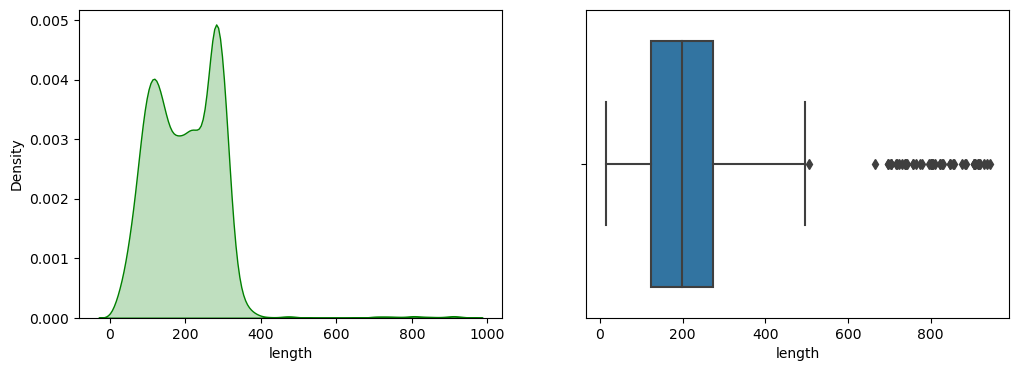

In [43]:
# Now we will try to analyze the lenght of tweets 
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df['length'],color='g',shade=True)
plt.subplot(1,2,2)
sns.boxplot(df['length'])
plt.show()

- We can see that most of tweets are having length under 500
- mean length is aroung 200

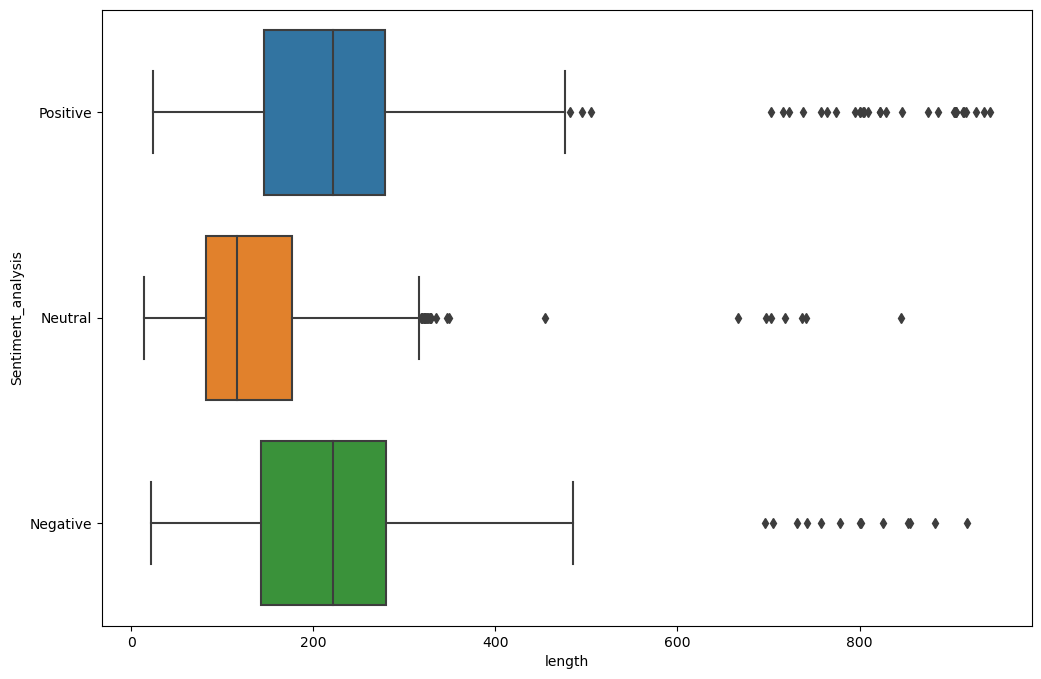

In [44]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='length', y='Sentiment_analysis')
plt.show()

- length can definitely help us to differentiate between neutral or non-neutral tweets but visually positive and negative are not able to be differentiated.

- we can perform test to compare the length of tweets

In [45]:
statt,p=stats.ttest_ind(df['length'][df['Sentiment_analysis'] == 'Positive'],
                    df['length'][df['Sentiment_analysis'] == 'Negative'])
    
if p<.05:
    result="Mean value of for both sentiment is different"  
else:
    result="Mean value of for both sentiment is same"  
print('--> P-value is',p,"\n-->",result,"\n")

--> P-value is 0.9220689945397764 
--> Mean value of for both sentiment is same 



- From this we clearly get the length of tweets cannot be useful in determining sentiment of tweets as length of both sentiments are same

In [46]:
# Now we will count the words used in tweets, for the same we will import counter
from collections import Counter

In [47]:
# Now we will visualize the count and common words used in tweets
df['temp_list'] = df['clean_tweets'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

- 'The' is the most common word used in the analysis

In [48]:
# We will try the above same thing using plotly too
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [49]:
# Now finally we will remove stop words as it can affect the accuracy of model
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
df['temp_list'] = df['temp_list'].apply(lambda x:remove_stopword(x))

In [50]:
df

tweets  likes  \
0     ….Booster vaccination followed by a primary om...      0   
1     Here the researchers investigated two immune h...      0   
2     Another study concurs: reinfection in unvaxxed...      0   
3     @marcorubio Wants to shut down the state from ...      0   
4     This finding suggests that the primary omicron...      0   
...                                                 ...    ...   
9995  @theage cancel culture ?   .... nah , more lik...      0   
9996  Someone takes the booster the body creates the...      0   
9997  @SmedleyHuxley @of_davey @thereal_truther Beca...      1   
9998  @1goodtern But omicron is weaker than past var...      0   
9999  @AtomsksSanakan @sinquirls @WashburneAlex @gor...      0   

                           time  retweet_count  length Sentiment_analysis  \
0     2022-11-02 05:26:10+00:00              0     118           Positive   
1     2022-11-02 05:25:51+00:00              0     236           Positive   
2     2022-11-02 05:25:31+00:00              0     301            Neutral   
3     2022-11-02 05:24:40+00:00              0     147           Positive   
4     2022-11-02 05:23:08+00:00              0     263           Positive   
...                         ...            ...     ...                ...   
9995  2022-10-26 13:20:03+00:00              0     144           Positive   
9996  2022-10-26 13:19:02+00:00              0     194            Neutral   
9997  2022-10-26 13:14:46+00:00              1     339           Positive   
9998  2022-10-26 13:13:53+00:00              0      88           Negative   
9999  2022-10-26 13:13:48+00:00              0     346           Positive   

                                           clean_tweets  \
0     Booster vaccination followed by a primary omic...   
1     Here the researchers investigated two immune h...   
2     Another study concurs reinfection in unvaxxed ...   
3     Wants to shut down the state from covid even t...   
4     This finding suggests that the primary omicron...   
...                                                 ...   
9995  cancel culture nah more likely pple who had bo...   
9996  Someone takes the booster the body creates the...   
9997  davey truther Because Omicron is the most cont...   
9998  But omicron is weaker than past variants so wh...   
9999  truther He predicted no vaccine effect against...   

                                           token_tweets  \
0     [Booster, vaccination, followed, by, a, primar...   
1     [Here, the, researchers, investigated, two, im...   
2     [Another, study, concurs, reinfection, in, unv...   
3     [Wants, to, shut, down, the, state, from, covi...   
4     [This, finding, suggests, that, the, primary, ...   
...                                                 ...   
9995  [cancel, culture, nah, more, likely, pple, who...   
9996  [Someone, takes, the, booster, the, body, crea...   
9997  [davey, truther, Because, Omicron, is, the, mo...   
9998  [But, omicron, is, weaker, than, past, variant...   
9999  [truther, He, predicted, no, vaccine, effect, ...   

                                            stem_tweets  \
0     booster vaccin follow by a primari omicron inf...   
1     here the research investig two immun histori w...   
2     anoth studi concur reinfect in unvax who had c...   
3     want to shut down the state from covid even th...   
4     thi find suggest that the primari omicron infe...   
...                                                 ...   
9995  cancel cultur nah more like pple who had book ...   
9996  someon take the booster the bodi creat the wuh...   
9997  davey truther becaus omicron is the most conta...   
9998  but omicron is weaker than past variant so wha...   
9999  truther he predict no vaccin effect against sp...   

                                       lemmatize_tweets  \
0     Booster vaccination followed by a primary omic...   
1     Here the researcher investigated two immune hi...   
2     Another study concurs

In [51]:
# Now we will look at the common words used after removing stopwords
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

- In this it is clearly seen that omnicron is the most common word used.

In [52]:
# Visualize the same using plotly
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [53]:
# we will also visualize the most common stop words used 
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

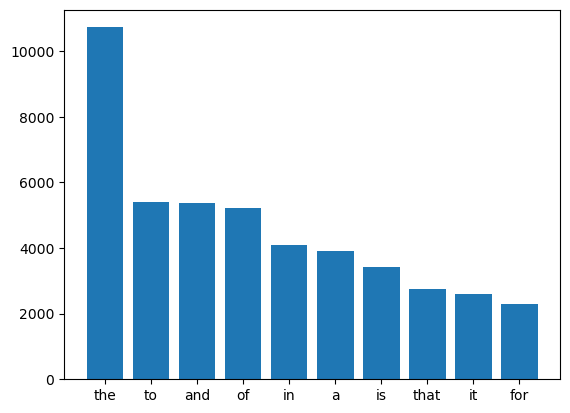

In [54]:
plot_top_stopwords_barchart(df['clean_tweets'])

- 'the' is the most common stopwords used in dataset

# Now we will go for Modelling part

### Splitting the Dataset in X and y 

In [55]:
# Split the data in X and y for modelling the data
X=df.lemmatize_tweets
y=df.Sentiment_analysis

In [56]:
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =26,stratify = df.Sentiment_analysis)

In [57]:
# creating an object of tfidf with ngram of 1 and 2
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  102311


In [58]:
# transforming the X values using tfidf
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [59]:
# As we will be using  various algorithms, we will just create a function that will evaluate the predicted and test value 
# and will provide classification report and confusion matrix

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Neutral','Positive']
    group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

We will use various Algorithms to get the result, likely:

- Naive Bayes
- Support Vector Machine
- Logistic Regression
- Decision Tree
- Random Forest
- Light Gradient Bossting

There After using Different Metrics we will interpret result of all Algorithms and Select the best of them

# Bernoulli Naive Bayes

              precision    recall  f1-score   support

    Negative       0.93      0.07      0.12       419
     Neutral       0.95      0.23      0.37       418
    Positive       0.62      1.00      0.76      1163

    accuracy                           0.64      2000
   macro avg       0.83      0.43      0.42      2000
weighted avg       0.75      0.64      0.55      2000



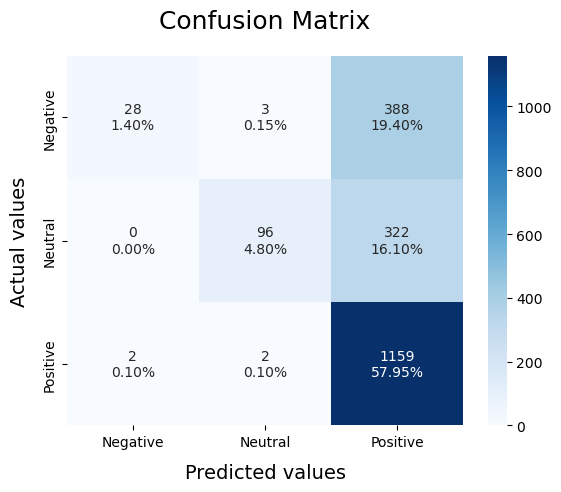

In [60]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

# SVM (Support Vector Machine)

              precision    recall  f1-score   support

    Negative       0.82      0.53      0.64       419
     Neutral       0.86      0.71      0.78       418
    Positive       0.79      0.94      0.86      1163

    accuracy                           0.81      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.81      0.81      0.80      2000



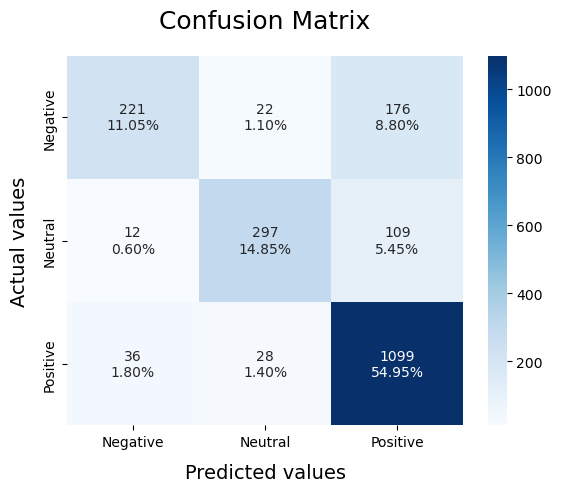

In [61]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

# Logistic Regression

              precision    recall  f1-score   support

    Negative       0.82      0.43      0.57       419
     Neutral       0.87      0.63      0.73       418
    Positive       0.76      0.96      0.85      1163

    accuracy                           0.78      2000
   macro avg       0.82      0.67      0.72      2000
weighted avg       0.79      0.78      0.76      2000



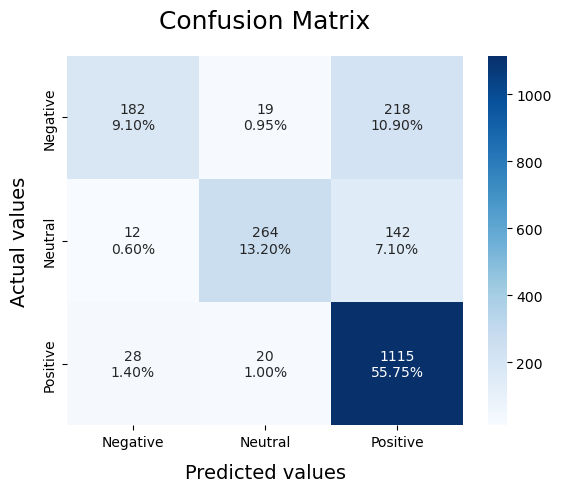

In [62]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

# Decision Tree

              precision    recall  f1-score   support

    Negative       0.58      0.29      0.39       419
     Neutral       0.51      0.80      0.62       418
    Positive       0.78      0.75      0.77      1163

    accuracy                           0.67      2000
   macro avg       0.62      0.62      0.59      2000
weighted avg       0.68      0.67      0.66      2000



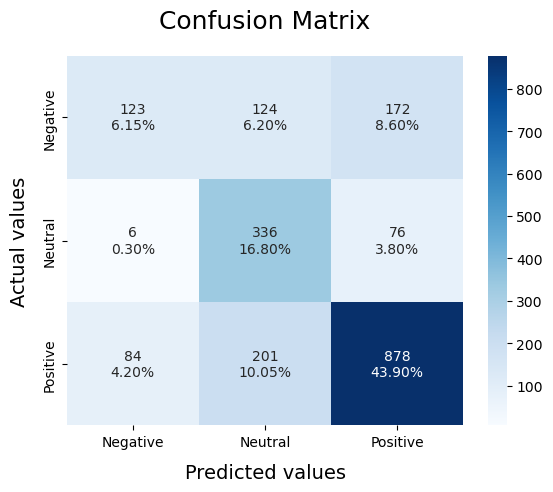

In [63]:
Dtmodel = DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=0) 
Dtmodel.fit(X_train, y_train)
model_Evaluate(Dtmodel)
y_pred4 = LRmodel.predict(X_test)

# Random Forest

              precision    recall  f1-score   support

    Negative       0.91      0.22      0.35       419
     Neutral       0.75      0.71      0.73       418
    Positive       0.73      0.94      0.82      1163

    accuracy                           0.74      2000
   macro avg       0.80      0.63      0.64      2000
weighted avg       0.77      0.74      0.71      2000



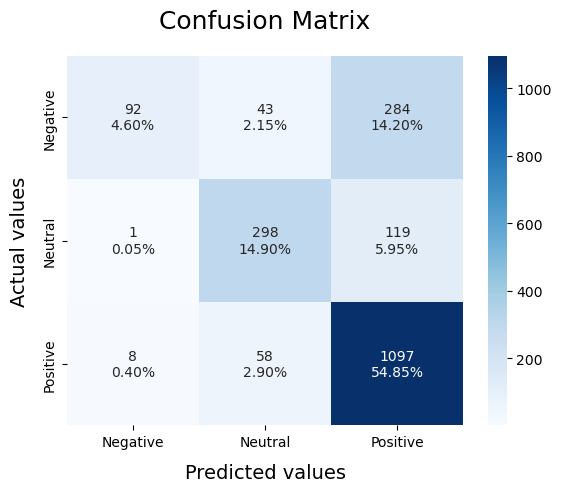

In [64]:
Rfmodel= RandomForestClassifier()
Rfmodel.fit(X_train, y_train)
model_Evaluate(Rfmodel)
y_pred5 = Rfmodel.predict(X_test)

# Light GBM

              precision    recall  f1-score   support

    Negative       0.79      0.58      0.66       419
     Neutral       0.76      0.95      0.85       418
    Positive       0.89      0.89      0.89      1163

    accuracy                           0.84      2000
   macro avg       0.81      0.81      0.80      2000
weighted avg       0.84      0.84      0.83      2000



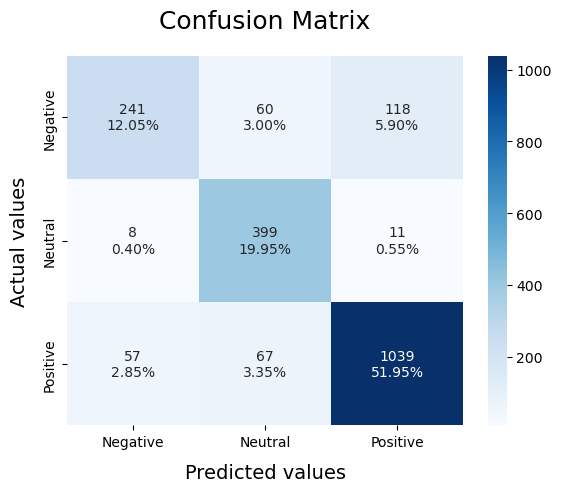

In [65]:
Lgbmmodel = lgb.LGBMClassifier()
Lgbmmodel.fit(X_train, y_train)
model_Evaluate(Lgbmmodel)
y_pred6 = Lgbmmodel.predict(X_test)

- Out of all above models we can say that **Light GBM** has out performed other models as accuracy is 0.84
- Fom the confusion matrix we can say that more than 50% of tweets ar positive and very less are negative
- Also, most wrongly predicted classes are associated with **positive** sentiment so, to further improve the model, we can even use under/over/SMOTE sampling method to improve the accuracy.
- Model is best performing for positive than neutral and lastly for negative sentiment as per the classification report.

### So, as per the above result we can use the model for the finding the sentiments of tweets related to deadly omicron........